# Ionisation energy losses
Author: Aleksander Filip Żarnecki (University of Warsaw)


In [1]:
import math
from ROOT import *
import numpy as np

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### ROOT style configuration

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(800)
gStyle.SetCanvasDefH(700)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.2,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### Part I
### Maximum energy transfer

In [3]:
# Maximum energy transfer in relativistic colistion
# of projectile with momentum p and mass M, to target with mass m
# Units:  c = 1

def Wmax(p,M,m):
    betagamma = p/M
    gamma = sqrt(1+betagamma*betagamma)
    
    val = 2*m*betagamma*betagamma
    corr = 1 + 2*gamma*(m/M) + (m/M)*(m/M)
    
    return val/corr

# Low energy approximation

def Wmaxle(p,M,m):
    betagamma = p/M
    gamma = sqrt(1+betagamma*betagamma)
    
    val = 2*m*betagamma*betagamma
#    corr = 1 + 2*gamma*(m/M) + (m/M)*(m/M)
    
    return val

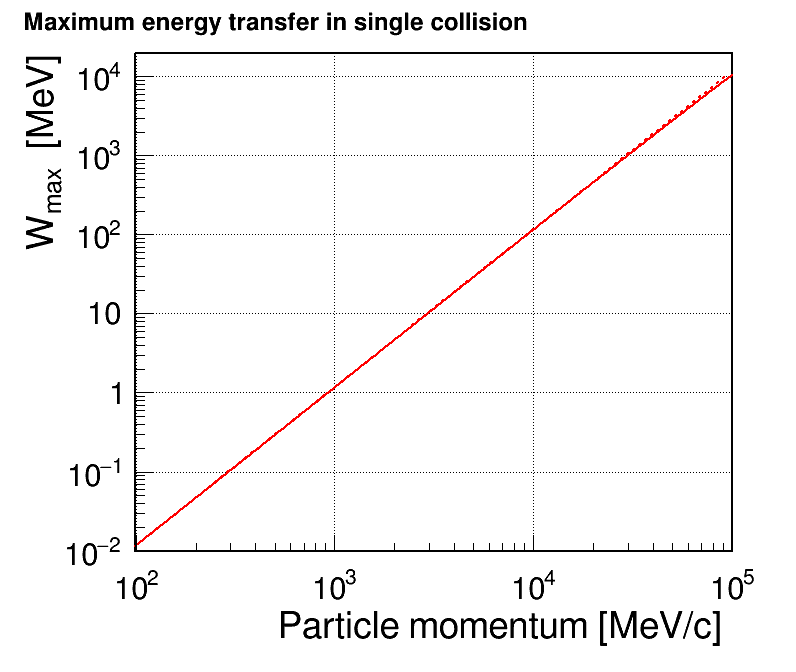

Info in <TCanvas::Print>: png file Wmax.png has been created


In [4]:
# Define root function to plot the momentum transfer
# Mass energy and momentum given in MeV

# Projectile mass

Mp = 938.272081    # proton
# Mp = 105.6583745   # muon

# Target mass

me = 0.51099895    # electron


def funWmax(x,par):
    return Wmax(x[0],par[0],par[1])

def funWmaxle(x,par):
    return Wmaxle(x[0],par[0],par[1])


fWmax=TF1("fWmax",funWmax,99.,100000.,2)
fWmax.SetTitle("Maximum energy transfer in single collision")
fWmax.SetParameter(0,Mp)   
fWmax.SetParameter(1,me) 
fWmax.SetNpx(1000)
fWmax.SetMinimum(1E-2)
fWmax.GetXaxis().SetTitle("Particle momentum [MeV/c]")
fWmax.GetYaxis().SetTitle("W_{max}  [MeV]")

fWmaxle=TF1("fWmaxle",funWmaxle,99.,1000000.,2)
fWmaxle.SetParameter(0,Mp)  
fWmaxle.SetParameter(1,me)

# Display function

cWmax=TCanvas('cWmax')
fWmax.Draw()

fWmaxle.SetLineStyle(2)
fWmaxle.Draw("same")

cWmax.SetLogx(1)
cWmax.SetLogy(1)
cWmax.Update()
cWmax.Print('Wmax.png')

Image(filename='Wmax.png')

### Part II
### Energy transfer in single collision

In [5]:
# Fine coupling constant
aem = 1/137.035999139

# Unit conversion factor 
hc = 197.3269788  # MeV * fm 

# Momentum transfer in quasi-statical approximation (Bohr)
# Image(filename='bohr_calc_new.png')

In [6]:
# Projectile with charge ze and velocity beta[c] 
# at distance b[fm] from electron at rest

def dp(b,p,M,z=1):
    betagamma = p/M
    beta = betagamma/sqrt(1+betagamma*betagamma)
    val = 2*z*aem/b/beta
    return val*hc

# Corresponding energy transfer to electron (classical)
def dE(b,p,M,z=1):
    pe = dp(b,p,M,z)
    return pe*pe/me/2.

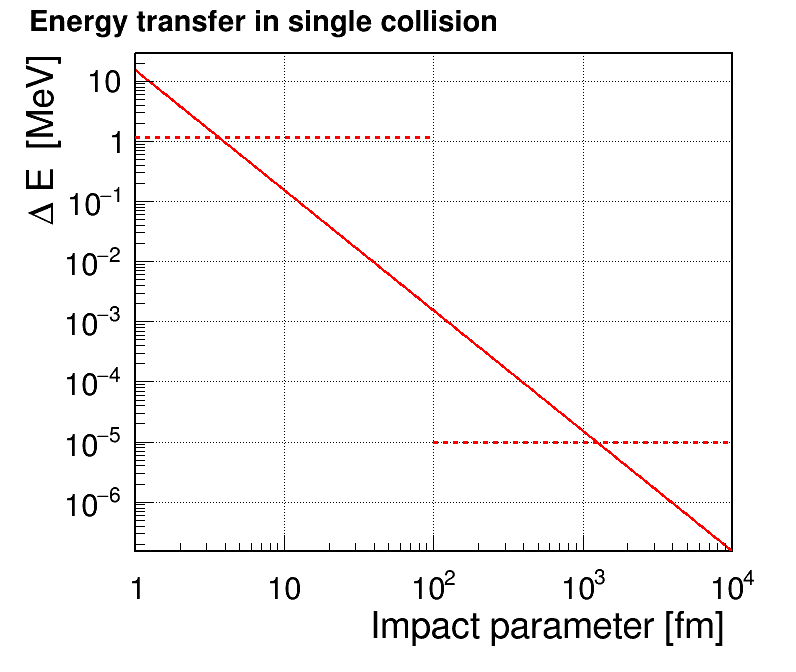

Info in <TCanvas::Print>: png file dE.png has been created


In [7]:
# Projectile momentum for the plot

pp = 1000   # MeV (!)

def fundE(x,par):
    return dE(x[0],par[0],par[1])

fdE=TF1("fdE",fundE,1.,10000.,2)
fdE.SetTitle("Energy transfer in single collision")
fdE.SetParameter(0,pp)   
fdE.SetParameter(1,Mp) 
fdE.SetNpx(1000)
fdE.GetXaxis().SetTitle("Impact parameter [fm]")
fdE.GetYaxis().SetTitle("#Delta E  [MeV]")

cdE=TCanvas('cdE')
cdE.SetLogx(1)
cdE.SetLogy(1)

fdE.Draw()

# Add maximum energy transfer line
Emax = Wmax(pp,Mp,me)

lmax = TLine(1.,Emax,100.,Emax)
lmax.SetLineStyle(7)
lmax.SetLineColor(2)
lmax.SetLineWidth(3)
lmax.Draw("same")

# Ionisation energy line (10 eV)

Emin = 0.00001

lmin = TLine(100.,Emin,10000.,Emin)
lmin.SetLineStyle(7)
lmin.SetLineColor(2)
lmin.SetLineWidth(3)
lmin.Draw("same")


cdE.Update()
cdE.Print('dE.png')

Image(filename='dE.png')

# dashed lines mimimal and maximal energy transfer

### Part III
### Average ionisation loss

In [8]:
# Avogadro constant 
NA = 6.022140857E+23

# Medium properties (for water)
Z2A = 0.55509 
rho = 1.0        # g/cm^3

# Combination of constants
K = 0.307075     # MeV*cm^2/mol

def dEdx(p,M,z=1):
    betagamma = p/M
    beta = betagamma/sqrt(1+betagamma*betagamma)
# Simplified model    
    # val = K*rho*Z2A*z*z/beta/beta*0.5*log(Wmax(p,M,me)/Emin)
# Full model (without density corrections)
    val = K*rho*Z2A*z*z/beta/beta*(0.5*log(Wmax(p,M,me)*Wmaxle(p,M,me)/Emin/Emin)-beta*beta)
    return val

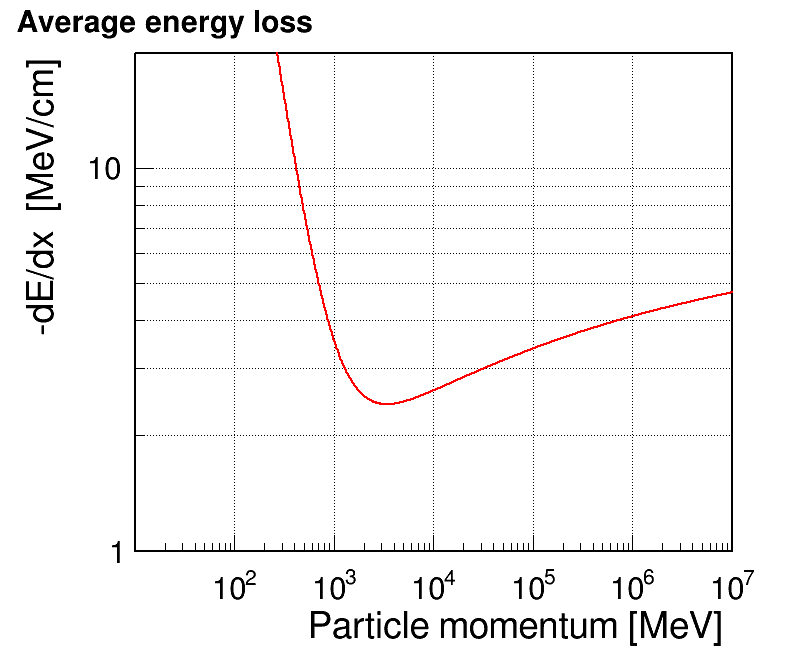

Info in <TCanvas::Print>: png file dEdx.png has been created


In [9]:
def fundEdx(x,par):
    return dEdx(x[0],par[0],par[1])

fdEdx=TF1("fdEdx",fundEdx,10.,10000000.,2)
fdEdx.SetTitle("Average energy loss")
fdEdx.SetParameter(0,Mp)   
fdEdx.SetParameter(1,1) 
fdEdx.SetNpx(1000)
fdEdx.SetMinimum(1.)
fdEdx.SetMaximum(20.)
fdEdx.GetXaxis().SetTitle("Particle momentum [MeV]")
fdEdx.GetYaxis().SetTitle("-dE/dx  [MeV/cm]")

cdEdx=TCanvas('cdEdx')
cdEdx.SetLogx(1)
cdEdx.SetLogy(1)

fdEdx.Draw()

cdEdx.Update()
cdEdx.Print('dEdx.png')

Image(filename='dEdx.png')

### Homework 

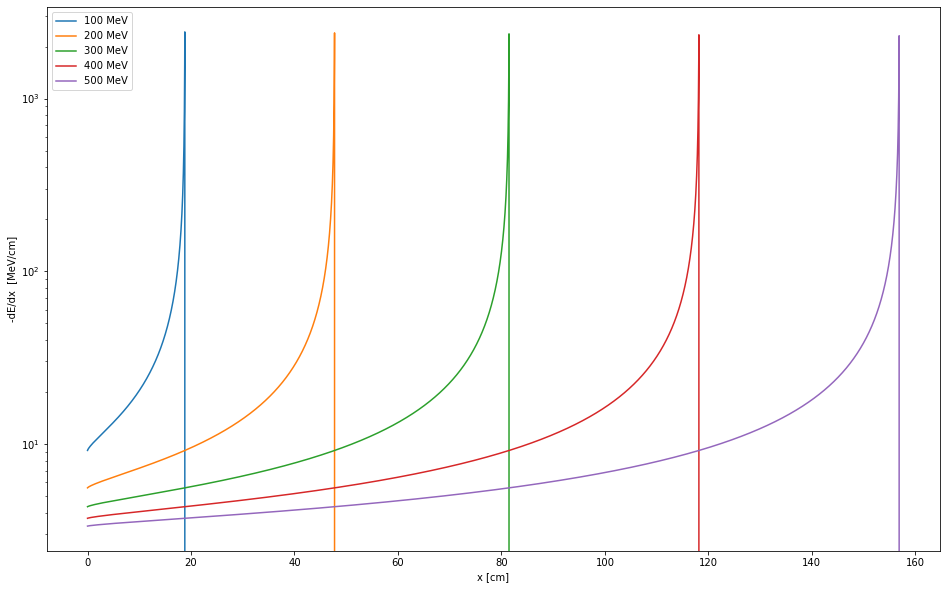

In [41]:
import matplotlib.pyplot as plt
from scipy import integrate

sE = np.array([100, 200, 300, 400, 500])    # set of energies

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)

for e in sE:    # loop over enegies
                # we generate energies from 0.1 (we want to avoid dividing by zero) to our
    startE = e
    Nsamples = 50000
    energies = np.linspace(0.1, startE, Nsamples)   
    M = Mp      #  proton mass

    gammas = 1 + energies / M   # calculate gammas
        
    p = gammas * np.sqrt(1 - 1 / (gammas ** 2)) * M     # calculate momenta corresponding to given energies
    betas = np.sqrt(1 - 1 / (gammas ** 2))      # the same with beta values
    invbetas = 1 / betas

    f_values = np.array([])     # array of Bethe-Bloch values for given momenta

    for mom in p:
        val = dEdx(mom,M,z=1)
        f_values = np.append(f_values, val)
        
    ffinal = 1 / f_values     # inverted values of Bethe-Bloch

    integrals = np.array([])

    for i in range(len(p) - 1):     # integration
        integ = np.trapz(ffinal[0:i], p[0:i])
        integrals = np.append(integrals, integ)

    # integrals = np.append(integrals, 0)
    
    y = f_values[0:(Nsamples - 1)] #* betas[0:(Nsamples - 1)]
                    
    a = np.flip(integrals)              # here we flip both arrays to receive process from starting energy to zero
    b = np.flip(y)     # multiply by beta to get energy dimension
    
    y[0] = 0


    # plt.plot(integrals * invbetas[0:(Nsamples - 1)], f_values[0:(Nsamples - 1)])
    # plt.plot(a, f_values[0:(Nsamples - 1)], label=str(e) + " MeV" )
    plt.plot(a, y, label=str(e) + " MeV" )
    
        
    plt.ylabel("-dE/dx  [MeV/cm]")
    plt.xlabel("x [cm]")
    plt.yscale("log")
    plt.legend()

### The best proton energy for medical purposes is around $200 \mathrm{MeV}$. It is due to the fact that the large adult male's pelvis, the deepest site in the human body is about 30 $\mathrm{cm}$, and energy around 200 $\mathrm{MeV}$ corresponds to this distance.

Source:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4407514/pdf/nihms-677175.pdf

In [37]:
f_values[0:(Nsamples - 1)]

print(f_values)

[2463.75588823 1858.84539594 1509.2968665  ...    3.34137568    3.34123068
    3.3410857 ]


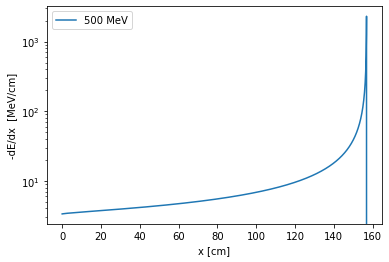

In [42]:
    plt.plot(a, y, label=str(e) + " MeV" )
    
        
    plt.ylabel("-dE/dx  [MeV/cm]")
    plt.xlabel("x [cm]")
    plt.yscale("log")
    plt.legend()